In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df = pd.read_csv('age-of-electoral-democracy-lexical.csv')

In [228]:
df = df.rename(columns={
    'Entity': 'Country',
    'Age of electoral democracy': 'Age'
})

In [229]:
df = df.drop(columns=['Code'])

In [230]:
df.dtypes

Country    object
Year        int64
Age        object
dtype: object

In [231]:
df_brazil = df.query('Country == "Brazil"').reset_index(drop=True)

In [232]:
df_brazil['Status'] = df_brazil['Age']

In [233]:
replacable_ages = [
    'non-electoral autocracy',
    'multi-party autocracy without elected executive',
    'one-party autocracy',
    'multi-party autocracy',
    'exclusive democracy'
]

for age in replacable_ages:
    df_brazil['Age'] = df_brazil['Age'].replace(age, 0)

In [234]:
numerical_statuses = [str(n) for n in range(1, 41)]

for status in numerical_statuses:
    df_brazil['Status'] = df_brazil['Status'].replace(status, 'electoral democracy')

In [235]:
df_brazil.dtypes

Country    object
Year        int64
Age        object
Status     object
dtype: object

In [236]:
df_brazil['Age'] = df_brazil['Age'].astype(int)

In [237]:
df_brazil.dtypes

Country    object
Year        int64
Age         int64
Status     object
dtype: object

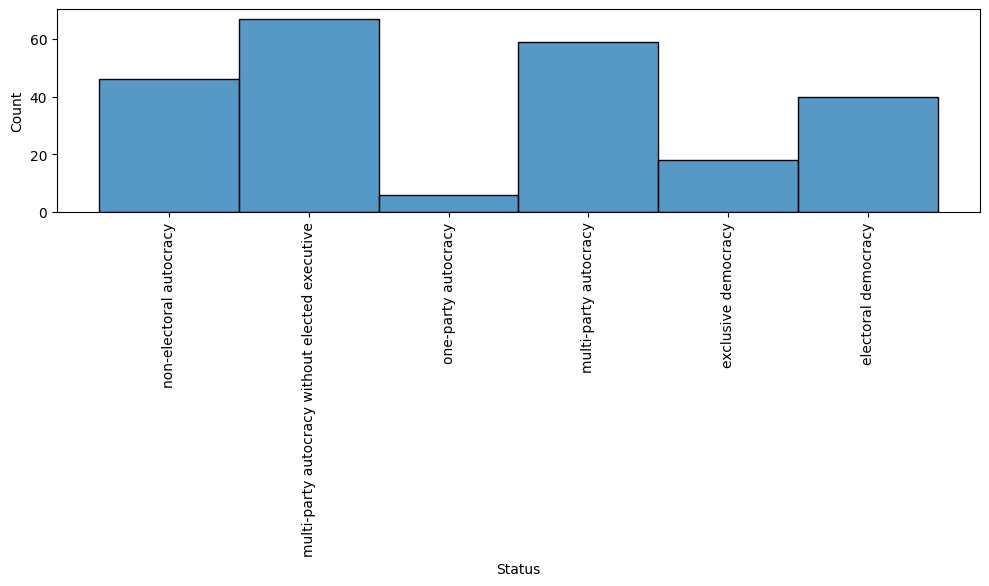

In [238]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_brazil['Status'])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()